<a href="https://colab.research.google.com/github/doandongdu/DUDOAN12/blob/main/RICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
train_image_files_path = '/content/drive/MyDrive/Gạo/Test'
valid_image_files_path = '/content/drive/MyDrive/Gạo/Train'

In [ ]:
label = ['arbrio', 'basmati', 'ipsala', 'jasmine', 'karacadag']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1/255)
validation_data_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(train_image_files_path, target_size = (200,200), class_mode = 'categorical')

In [ ]:
x_train,y_train = next(train_generator)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 5)

In [ ]:
x_train = x_train.reshape(32,120000)
x_train = x_train.astype ('float32')
x_train = x_train/255
x_train.shape

(32, 120000)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(5,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               61440512  
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 61,443,077
Trainable params: 61,443,077
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 200, batch_size = 128)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.6094 - accuracy: 0.1562
Epoch 2/200
1/1 [==============================] - 1s 553ms/step - loss: 1.4183 - accuracy: 0.4375
Epoch 3/200
1/1 [==============================] - 1s 636ms/step - loss: 1.1942 - accuracy: 0.6875
Epoch 4/200
1/1 [==============================] - 1s 566ms/step - loss: 1.0902 - accuracy: 0.5625
Epoch 5/200
1/1 [==============================] - 1s 557ms/step - loss: 1.0055 - accuracy: 0.7188
Epoch 6/200
1/1 [==============================] - 1s 601ms/step - loss: 0.8669 - accuracy: 0.6250
Epoch 7/200
1/1 [==============================] - 1s 567ms/step - loss: 0.7897 - accuracy: 0.9688
Epoch 8/200
1/1 [==============================] - 1s 548ms/step - loss: 0.7135 - accuracy: 0.7188
Epoch 9/200
1/1 [==============================] - 1s 551ms/step - loss: 0.6597 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 1s 566ms/step - loss: 0.6114 - accuracy: 0.7812
Epoch 11/200

In [ ]:
model.save('nhan_dien_gao.h5')

1/1 [==============================] - 0s 46ms/step
[[0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 50ms/step
Đây là gạo  jasmine


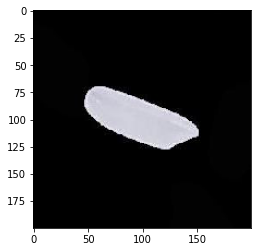

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Gạo/Train/Jasmine/Jasmine (12).jpg', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1, 200*200*3)
img = img/255
print(model.predict(img))
a = int(np.argmax(model.predict(img), axis = 1))
print("Đây là gạo ", label[a])

1/1 [==============================] - 0s 51ms/step
[[0. 0. 0. 0. 1.]]
1/1 [==============================] - 0s 47ms/step
Đây là hoa: karacadag


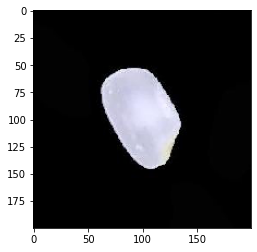

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Gạo/Train/Karacadag/Karacadag (1).jpg', target_size = (200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1, 200*200*3)
img = img/255
print(model.predict(img))
a = int(np.argmax(model.predict(img), axis = 1))
print("Đây là hoa:", label[a])